<a href="https://colab.research.google.com/github/fgd806/Bioninformatics/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import urllib.request

data_path = 'cullpdb_pc30_res3.0_R1.0_d191017_chains18877.gz'

# This just opens the data set and prints out the contents line by line
pdbIds = []

with open(data_path, 'r') as f:
    lines = f.read()
    #print(lines)

i = 0
    
for line in lines.split('\n'):
  if line[0:3] != 'IDs':
    pdbIds.append(line[0:5])
    i+=1
  if i==100:
    break
    
print(pdbIds)



['12ASA', '16VPA', '19HCA', '1A0AA', '1A0IA', '1A0TP', '1A1XA', '1A2PA', '1A2XB', '1A3AA', '1A41A', '1A5TA', '1A62A', '1A73A', '1A7JA', '1A8LA', '1A92A', '1A9XA', '1A9XB', '1AB8A', '1ABAA', '1AC5A', '1ACFA', '1AE9A', '1AEPA', '1AGJA', '1AH7A', '1AHOA', '1AHSA', '1AISB', '1AJOA', '1AKOA', '1AL3A', '1ALUA', '1ALYA', '1AM7A', '1AOCA', '1AOHA', '1AOLA', '1AOZA', '1APYB', '1AQZA', '1AT0A', '1ATGA', '1ATZA', '1AUOA', '1AVGI', '1AVOA', '1AVOB', '1AX8A', '1AXIB', '1AYOA', '1AZOA', '1AZSA', '1B0NB', '1B25A', '1B33N', '1B35A', '1B35B', '1B35C', '1B35D', '1B3UA', '1B5EA', '1B5QA', '1B63A', '1B77A', '1B89A', '1B8KA', '1B9HA', '1B9LA', '1B9MA', '1B9WA', '1BAZA', '1BB1A', '1BB9A', '1BCOA', '1BCPA', '1BCPB', '1BCPD', '1BCPF', '1BD8A', '1BDFA', '1BEAA', '1BF2A', '1BG1A', '1BG6A', '1BGFA', '1BH9A', '1BH9B', '1BHEA', '1BIAA', '1BJAA', '1BKRA', '1BKVA', '1BL0A', '1BM8A', '1BM9A', '1BMTA', '1BOOA', '1BOUA']


hello


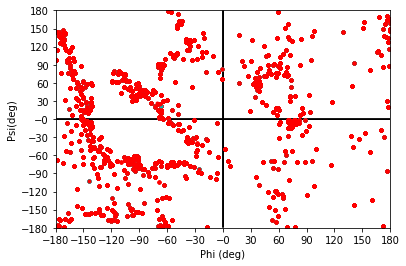

In [0]:
"""#4 Analyze the torsion angles in each type of helices. Build something similar to
Ramachandran plot but for different types of helices"""


from google.colab import files 
from google.colab import drive
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import re
import sys


data_path = 'cullpdb_pc30_res3.0_R1.0_d191017_chains18877.gz'

pdbIds = []
acids_in_beta_sheets = []
count_coordinates = 0
with open(data_path, 'r') as f:
    lines = f.read()

i = 0
for line in lines.split('\n'):
  if line[0:3] != 'IDs':
    pdbIds.append(line[0:5])
    if i == 100:
      break
  i+=1

helix_lines = []
remark_lines = []

for id in pdbIds:
  sum = 0
  pdb = id[0:4]
  chain = id[-1].upper()
  url = 'https://files.rcsb.org/download/'+pdb+'.pdb'
  fileName = pdb + '.pdb'
  file = urllib.request.urlretrieve(url,fileName)
  pdbFile = open(fileName, "r")
  fileContents = pdbFile.readlines()
  for line in fileContents:
    
    if(line[:6] == 'REMARK'):
      remark_info = line.split()
      if(len(remark_info) == 7 and remark_info[1] == '500' and remark_info[6] != "SIDE_CHAIN"
                          and remark_info[6] != "TYPE" and remark_info[6] != "CODE)."
                          and remark_info[6] != "PHI" and remark_info[3] == str(chain)):
        
        count_coordinates+=1
        remark_lines.append(line)
    if(line[:5] == 'HELIX' and line[19] == chain):
      helix_lines.append(line)
      info = line.split()
      lower_bound = info[5]
      upper_bound = info[8]
      
for i in range(count_coordinates - 1):
  coordinate_line = remark_lines[i].split()

phi = np.array([])
psi = np.array([])
helix_type = []

for helix in helix_lines:
  info = helix.split()
  lower_bound = info[5]
  upper_bound = info[8]
  
  if(info[4]) == str(chain):
    for angle in remark_lines:
      info2 = angle.split()
      seq = info2[4]
      if seq < lower_bound:
        continue
      if seq > upper_bound:
        pass
      else:
        num = info[9]
        phi = np.append(phi, float(info2[6]))
        
        psi = np.append(psi, float(info2[5]))
        
        if(num.isdigit()): 
          helix_type.append(num)
        else:
          real_num = re.split('[a-zA-Z]', num)[0]
          helix_type.append(real_num)

plot_2_arrays(phi, psi, "Phi (deg)", "Psi(deg)", helix_type)



def plot_2_arrays(x, y, x_label_in, y_label_in, hel_type):
  """Function to plot two one-dimensional arrays"""
 
  phi_length = len(x) - 1
  i = 0
  for num in hel_type:
    if(i >= phi_length):
      break
    col = numbers_to_colors(int(num))
    plt.plot(x[i], y[i], col + ".")
    i += 1
    
  plt.xlim(-180, 180)
  plt.ylim(-180, 180)
  plt.xticks(np.arange(-180.1, 180.1, 30)) # Sets ticks markers for x axis
  plt.yticks(np.arange(-180.1, 180.1, 30)) # Sets ticks markers for y axis
  plt.xlabel(x_label_in) # Adds axis label
  plt.ylabel(y_label_in) # Adds axis label
  plt.arrow(-180, 0, 360, 0)
  plt.arrow(0, -180, 0, 360) # Creates an arrow

  # Show plot
  plt.show()




def numbers_to_colors(argument): 
    switcher = { 
        1: "r", 
        2: "b",
        3: "g",
        4: "k",
        5: "c",
        6: "m",
        7: "y",
        8: "pink",
        9: "darkolivegreen",
        10: "brown" 
    } 
    return switcher.get(argument, "nothing")





['1', '5']
Ramachandran Plot for Helices of Type  1


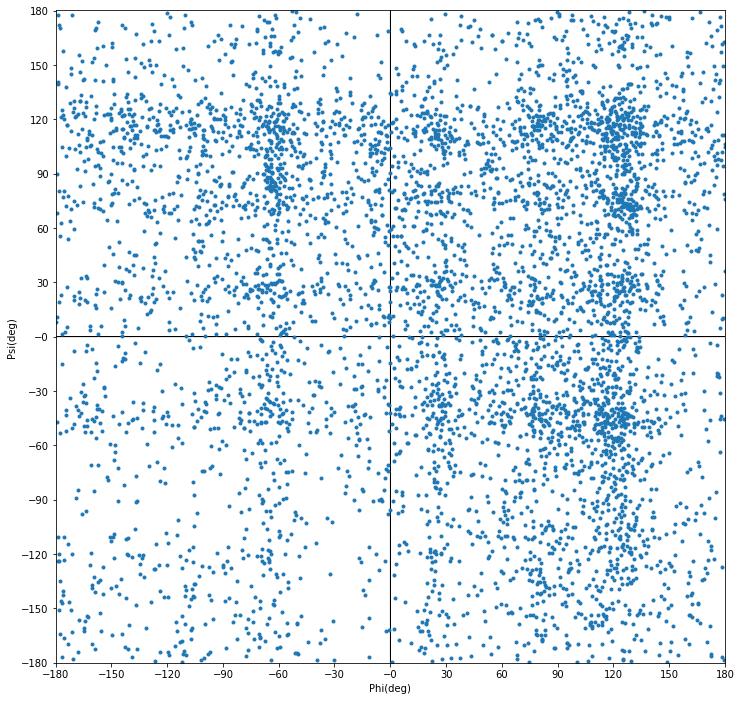

Ramachandran Plot for Helices of Type  5


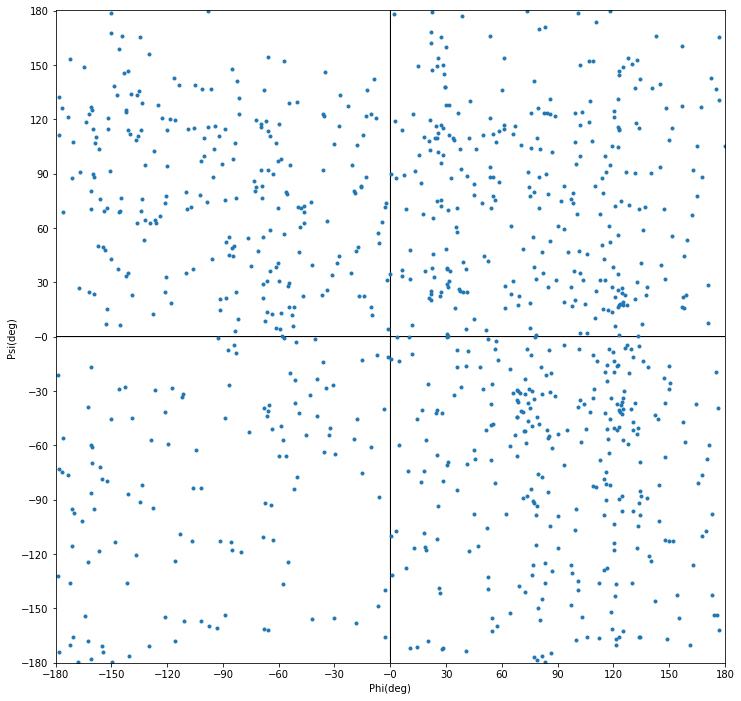

In [0]:
'''6 Build Ramachandran plots'''

def calcTorsion(atomList):
  columns = 3
  rows = 9999
  co = np.array([[0]*columns]*rows,float)
  n = np.array([[0]*columns]*rows,float)
  ca = np.array([[0]*columns]*rows,float)
  # Set up counts
  count_res = 0
  former_res = -9999
  new_res = -9998
  found_co = 0
  found_n = 0
  found_ca = 0
  for line in atomList:
    if line[0:6] == "ATOM  " and line[13:15] == "C ":
      co[count_res,0] = float(line[30:38]) 
      co[count_res,1] = float(line[38:46]) 
      co[count_res,2] = float(line[46:54]) 
      new_res = int(line[22:26])
      found_co = 1
    elif line[0:6] == "ATOM  " and line[13:15] == "N ":
      n[count_res,0] = float(line[30:38]) 
      n[count_res,1] = float(line[38:46]) 
      n[count_res,2] = float(line[46:54]) 
      new_res = int(line[22:26])
      found_n = 1
    elif line[0:6] == "ATOM  " and line[13:15] == "CA":
      ca[count_res,0] = float(line[30:38]) 
      ca[count_res,1] = float(line[38:46]) 
      ca[count_res,2] = float(line[46:54]) 
      found_ca =1
      new_res = int(line[22:26]) 
    complete_mc = found_co * found_n * found_ca 
    if former_res != new_res and complete_mc:
      former_res = new_res
      count_res += 1 
      found_co = 0 
      found_n = 0 
      found_ca = 0
  # Set up arrays for phi and psi angles
  phi = np.zeros(count_res - 1)
  psi = np.zeros(count_res - 1)
  # Looping through phi psi atoms in each residue
  for i in range(count_res-1):
  # Calls torsion function
    phi[i] = torsion(co[i],n[i+1],ca[i+1],co[i+1]) 
    psi[i] = torsion(n[i+1],ca[i+1],co[i+1],n[i+2])

  # Return arrays
  return phi,psi

def torsion(p1,p2,p3,p4):
  """Function to calculate torsion angle for atoms a,b,c, and d""" 
  # Get coordinates for vectors q1, q2 and q3
  q1 = np.subtract(p2,p1) # b - a
  q2 = np.subtract(p3,p2) # c - b
  q3 = np.subtract(p4,p3) # d - c
  # Calculate cross vectors
  q1_x_q2 = np.cross(q1,q2)
  q2_x_q3 = np.cross(q2,q3)
  n1 = q1_x_q2/np.sqrt(np.dot(q1_x_q2,q1_x_q2))
  n2 = q2_x_q3/np.sqrt(np.dot(q2_x_q3,q2_x_q3))
  # Calculate unit vectors
  u1 = n2
  u3 = q2/(np.sqrt(np.dot(q2,q2)))
  u2 = np.cross(u3,u1)
  # Calculate cosine and sine
  cos_theta = np.dot(n1,u1)
  sin_theta = np.dot(n1,u2)
  # Calculate torsion angle
  theta = -math.atan2(sin_theta,cos_theta)
  theta_deg = np.degrees(theta)

  # Return torsion angle in degrees
  return theta_deg

def plotPhiPsi(x,y,xlabel,ylabel):
  plt.figure(figsize=(12,12))
  plt.plot(x,y,".")
  #plt.figure(figsize=(20,20))
  plt.xlim(-180,180) # Sets axis limits
  plt.ylim(-180,180) # Sets axis limits 
  plt.xticks(np.arange(-180.1,180.1,30)) # Sets ticks markers for x axis 
  plt.yticks(np.arange(-180.1,180.1,30)) # Sets ticks makers for y axis
  plt.xlabel(xlabel) 
  plt.ylabel(ylabel) 
  plt.arrow(-180,0,360,0) 
  plt.arrow(0,-180,0,360) # Show plot
  plt.show()





helixFinal={}
helixTypes = []
#load data into fileContents
for id in pdbIds:
  helixSE = {}
  AADict = {}
  i=0;j=0
  pdb = id[0:4]
  chain = id[-1].upper()
  url = 'https://files.rcsb.org/download/'+pdb+'.pdb'
  fileName = pdb + '.pdb'
  file = urllib.request.urlretrieve(url,fileName)
  pdbFile = open(fileName, "r")
  fileContents = pdbFile.readlines()
  for line in fileContents:
    if line[:5] == 'HELIX' and line[19:20]==chain and line[31:32]==chain:
      if line[39:40] not in helixSE:
        helixSE[line[39:40]] = [int(line[22:25]),int(line[34:37])]
      else:
        helixSE[line[39:40]].append(int(line[22:25]))
        helixSE[line[39:40]].append(int(line[34:37]))
      i+=1
  #loop through helixes in chain
  for helix in helixSE:
    #loop through lines of pdb file to find start and stop of AA
    if helix not in helixTypes:
      helixTypes.append(helix)
    h = helixSE.get(helix)
    length = len(h)/2
    j=0
    for x in range(int(length)):
      for line in fileContents:
        #if in helix add to AADict
        if line[:4] == 'ATOM' and int(line[23:26]) >= helixSE[helix][j] and int(line[23:26])<= helixSE[helix][j+1] and line[21:22]==chain:
          if (line[17:20] not in AADict):
            AADict[line[17:20]] = [line.strip()+" "+helix]
          else:
            AADict[line[17:20]].append(line.strip()+" "+helix)
      if ((j+2)<(len(h))):
        j+=2

  for aa in AADict:
    phi,psi = calcTorsion(AADict[aa])
    helixType = AADict[aa][0][-1]
    if(len(phi)!=0):
      for p in range(len(phi)):
        if(helixType+"phi" not in helixFinal):
          helixFinal[helixType+"phi"] = [phi[p]]
        else:
          helixFinal[helixType+"phi"].append(phi[p])
    if(len(psi)!=0):
      for p in range(len(psi)):
        if(helixType+"psi" not in helixFinal):
          helixFinal[helixType+"psi"] = [psi[p]]
        else:
          helixFinal[helixType+"psi"].append(psi[p])

for h in helixTypes:
  print("Ramachandran Plot for Helices of Type",h)
  plotPhiPsi(helixFinal[h+'phi'],helixFinal[h+'psi'],'Phi(deg)','Psi(deg)')



In [0]:
''' 5. Analyze the amino acids that prefer to form/be part of beta-sheets. Analyze the number of strands in beta-sheets.'''

from google.colab import files 
from google.colab import drive
import urllib.request
import pandas as pd
import sys

#import urlib.request

data_path = 'cullpdb_pc30_res3.0_R1.0_d191017_chains18877.gz'

# This just opens the data set and prints out the contents line by line
pdbIds = []
acids_in_beta_sheets = []
with open(data_path, 'r') as f:
    lines = f.read()
    #print(lines)

i = 0
    
for line in lines.split('\n'):
  if line[0:3] != 'IDs':
    pdbIds.append(line[0:5])
    i+=1
  if i==100:
    break

id_list = []
sum_list = []
amino_acid_list = []
for id in pdbIds:
  #print(pdb)
  sum = 0
  pdb = id[0:4]
  chain = id[-1].upper()
  url = 'https://files.rcsb.org/download/'+pdb+'.pdb'
  fileName = pdb + '.pdb'
  file = urllib.request.urlretrieve(url,fileName)
  pdbFile = open(fileName, "r")
  fileContents = pdbFile.readlines()
  for line in fileContents:
    
    if(line[:5] == 'SHEET' and line[13] == str(chain)):
      info = line.split()
      amino_acid = line[17:21]
      amino_acid_list.append(amino_acid)
      if amino_acid not in acids_in_beta_sheets:
        acids_in_beta_sheets.append(amino_acid)
      num = info[3]
      if num.isdigit():
        sum+=int(num)
      else:
        next
  sum_list.append(sum)
  df = pd.DataFrame()
  pd.set_option("display.max_rows", None)
  df["# Of Strands"] = sum_list
  print(id)
  display(df)
  sum_list = []

df = pd.DataFrame()
pd.set_option("display.max_rows", None)
df["Acids that prefer to be in beta sheets"] = acids_in_beta_sheets
display(df)


In [0]:
"""
1. Find the popularity of different kind of helices: 
read the data set and analyze it to find the popularity of each type of helices.
"""
from collections import Counter

helixList = []

for id in pdbIds:
  pdb = id[0:4]
  chain = id[-1].upper()
  url = 'https://files.rcsb.org/download/'+pdb+'.pdb'
  fileName = pdb + '.pdb'
  file = urllib.request.urlretrieve(url,fileName)
  pdbFile = open(fileName, "r")
  fileContents = pdbFile.readlines()
  for line in fileContents:
    if line[:5] == 'HELIX':
      helixList.append(line[38:40].replace(" ", ""))
  listCount = Counter(helixList)

print(listCount)

Counter({'1': 1645, '5': 598})


In [0]:
"""
3. Analyze the length of helices (in terms of number of AAs). Is there any relation between
the type of a helix and its length?
"""

helixDict1 = {}
helixDict2 = {}

for id in pdbIds:
  pdb = id[0:4]
  chain = id[-1].upper()
  url = 'https://files.rcsb.org/download/'+pdb+'.pdb'
  fileName = pdb + '.pdb'
  file = urllib.request.urlretrieve(url,fileName)
  pdbFile = open(fileName, "r")
  fileContents = pdbFile.readlines()
  for line in fileContents:
    if line[19:20] == chain:
        if line[:5] == 'HELIX':
            helixNumber = int(line[8:10].replace(" ", ""))
            helixDict1["Type"] = line[38:40].replace(" ", "")
            lowerBound = int(line[22:25].replace(" ", ""))
            upperBound = int(line[34:37].replace(" ", ""))
            helixDict1["Length"] = float(upperBound - lowerBound)
            helixDict2[helixNumber] = dict(helixDict1)
  df3 = pd.DataFrame.from_dict(helixDict2, orient="index")
  print("\nProtein ID:", id)
  typeMeans = df3.groupby("Type").aggregate(np.mean)
  print("Average helix length of", id, "by helix type:")
  display(typeMeans)


Protein ID: 12ASA
Average helix length of 12ASA by helix type:


,Length
Type,
1,11.222222
5,3.000000



Protein ID: 16VPA
Average helix length of 16VPA by helix type:


,Length
Type,
1,13.000000
5,19.666667



Protein ID: 19HCA
Average helix length of 19HCA by helix type:


,Length
Type,
1,6.923077
5,2.400000



Protein ID: 1A0AA
Average helix length of 1A0AA by helix type:


,Length
Type,
1,8.357143
5,3.250000



Protein ID: 1A0IA
Average helix length of 1A0IA by helix type:


,Length
Type,
1,9.285714
5,3.250000



Protein ID: 1A0TP
Average helix length of 1A0TP by helix type:


,Length
Type,
1,9.0
5,2.5



Protein ID: 1A1XA
Average helix length of 1A1XA by helix type:


,Length
Type,
1,8.428571
5,2.363636



Protein ID: 1A2PA
Average helix length of 1A2PA by helix type:


,Length
Type,
1,8.111111
5,2.444444



Protein ID: 1A2XB
Average helix length of 1A2XB by helix type:


,Length
Type,
1,10.111111
5,2.444444



Protein ID: 1A3AA
Average helix length of 1A3AA by helix type:


,Length
Type,
1,10.900
5,4.125



Protein ID: 1A41A
Average helix length of 1A41A by helix type:


,Length
Type,
1,11.285714
5,2.500000



Protein ID: 1A5TA
Average helix length of 1A5TA by helix type:


,Length
Type,
1,11.285714
5,6.500000



Protein ID: 1A62A
Average helix length of 1A62A by helix type:


,Length
Type,
1,10.692308
5,5.600000



Protein ID: 1A73A
Average helix length of 1A73A by helix type:


,Length
Type,
1,11.25
5,5.00



Protein ID: 1A7JA
Average helix length of 1A7JA by helix type:


,Length
Type,
1,12.5
5,4.5



Protein ID: 1A8LA
Average helix length of 1A8LA by helix type:


,Length
Type,
1,11.083333
5,7.000000



Protein ID: 1A92A
Average helix length of 1A92A by helix type:


,Length
Type,
1,13.166667
5,8.166667



Protein ID: 1A9XA
Average helix length of 1A9XA by helix type:


,Length
Type,
1,9.694444
5,3.600000



Protein ID: 1A9XB
Average helix length of 1A9XB by helix type:


,Length
Type,
1,9.222222
5,4.000000



Protein ID: 1AB8A
Average helix length of 1AB8A by helix type:


,Length
Type,
1,9.553191
5,3.166667



Protein ID: 1ABAA
Average helix length of 1ABAA by helix type:


,Length
Type,
1,9.604167
5,3.272727



Protein ID: 1AC5A
Average helix length of 1AC5A by helix type:


,Length
Type,
1,9.097561
5,4.555556



Protein ID: 1ACFA
Average helix length of 1ACFA by helix type:


,Length
Type,
1,9.363636
5,5.066667



Protein ID: 1AE9A
Average helix length of 1AE9A by helix type:


,Length
Type,
1,9.111111
5,6.000000



Protein ID: 1AEPA
Average helix length of 1AEPA by helix type:


,Length
Type,
1,10.4
5,6.0



Protein ID: 1AGJA
Average helix length of 1AGJA by helix type:


,Length
Type,
1,8.809524
5,3.705882



Protein ID: 1AH7A
Average helix length of 1AH7A by helix type:


,Length
Type,
1,10.020833
5,4.636364



Protein ID: 1AHOA
Average helix length of 1AHOA by helix type:


,Length
Type,
1,9.937500
5,4.636364



Protein ID: 1AHSA
Average helix length of 1AHSA by helix type:


,Length
Type,
1,9.812500
5,4.636364



Protein ID: 1AISB
Average helix length of 1AISB by helix type:


,Length
Type,
1,9.693878
5,5.000000



Protein ID: 1AJOA
Average helix length of 1AJOA by helix type:


,Length
Type,
1,9.239130
5,4.307692



Protein ID: 1AKOA
Average helix length of 1AKOA by helix type:


,Length
Type,
1,8.468085
5,3.750000



Protein ID: 1AL3A
Average helix length of 1AL3A by helix type:


,Length
Type,
1,8.306122
5,4.100000



Protein ID: 1ALUA
Average helix length of 1ALUA by helix type:


,Length
Type,
1,9.531915
5,5.416667



Protein ID: 1ALYA
Average helix length of 1ALYA by helix type:


,Length
Type,
1,9.173913
5,5.153846



Protein ID: 1AM7A
Average helix length of 1AM7A by helix type:


,Length
Type,
1,8.673469
5,4.100000



Protein ID: 1AOCA
Average helix length of 1AOCA by helix type:


,Length
Type,
1,8.586957
5,3.692308



Protein ID: 1AOHA
Average helix length of 1AOHA by helix type:


,Length
Type,
1,8.326087
5,3.692308



Protein ID: 1AOLA
Average helix length of 1AOLA by helix type:


,Length
Type,
1,8.227273
5,3.666667



Protein ID: 1AOZA
Average helix length of 1AOZA by helix type:


,Length
Type,
1,8.333333
5,4.357143



Protein ID: 1APYB
Average helix length of 1APYB by helix type:


,Length
Type,
1,8.468085
5,4.250000



Protein ID: 1AQZA
Average helix length of 1AQZA by helix type:


,Length
Type,
1,8.367347
5,4.300000



Protein ID: 1AT0A
Average helix length of 1AT0A by helix type:


,Length
Type,
1,8.468085
5,3.916667



Protein ID: 1ATGA
Average helix length of 1ATGA by helix type:


,Length
Type,
1,8.489362
5,5.083333



Protein ID: 1ATZA
Average helix length of 1ATZA by helix type:


,Length
Type,
1,8.530612
5,4.100000



Protein ID: 1AUOA
Average helix length of 1AUOA by helix type:


,Length
Type,
1,8.854167
5,3.909091



Protein ID: 1AVGI
Average helix length of 1AVGI by helix type:


,Length
Type,
1,8.765957
5,3.750000



Protein ID: 1AVOA
Average helix length of 1AVOA by helix type:


,Length
Type,
1,8.93617
5,3.75000



Protein ID: 1AVOB
Average helix length of 1AVOB by helix type:


,Length
Type,
1,10.520833
5,3.909091



Protein ID: 1AX8A
Average helix length of 1AX8A by helix type:


,Length
Type,
1,10.000000
5,4.545455



Protein ID: 1AXIB
Average helix length of 1AXIB by helix type:


,Length
Type,
1,9.978723
5,4.416667



Protein ID: 1AYOA
Average helix length of 1AYOA by helix type:


,Length
Type,
1,9.565217
5,4.307692



Protein ID: 1AZOA
Average helix length of 1AZOA by helix type:


,Length
Type,
1,8.425532
5,3.833333



Protein ID: 1AZSA
Average helix length of 1AZSA by helix type:


,Length
Type,
1,8.804348
5,5.307692



Protein ID: 1B0NB
Average helix length of 1B0NB by helix type:


,Length
Type,
1,8.787234
5,5.583333



Protein ID: 1B25A
Average helix length of 1B25A by helix type:


,Length
Type,
1,8.777778
5,4.714286



Protein ID: 1B33N
Average helix length of 1B33N by helix type:


,Length
Type,
1,8.782609
5,4.000000



Protein ID: 1B35A
Average helix length of 1B35A by helix type:


,Length
Type,
1,7.866667
5,3.857143



Protein ID: 1B35B
Average helix length of 1B35B by helix type:


,Length
Type,
1,7.222222
5,3.785714



Protein ID: 1B35C
Average helix length of 1B35C by helix type:


,Length
Type,
1,7.465116
5,2.875000



Protein ID: 1B35D
Average helix length of 1B35D by helix type:


,Length
Type,
1,7.186047
5,2.312500



Protein ID: 1B3UA
Average helix length of 1B3UA by helix type:


,Length
Type,
1,10.00
5,4.75



Protein ID: 1B5EA
Average helix length of 1B5EA by helix type:


,Length
Type,
1,10.183673
5,4.700000



Protein ID: 1B5QA
Average helix length of 1B5QA by helix type:


,Length
Type,
1,9.700000
5,3.888889



Protein ID: 1B63A
Average helix length of 1B63A by helix type:


,Length
Type,
1,9.957447
5,3.666667



Protein ID: 1B77A
Average helix length of 1B77A by helix type:


,Length
Type,
1,10.021277
5,3.250000



Protein ID: 1B89A
Average helix length of 1B89A by helix type:


,Length
Type,
1,9.060000
5,5.888889



Protein ID: 1B8KA
Average helix length of 1B8KA by helix type:


,Length
Type,
1,9.060000
5,5.888889



Protein ID: 1B9HA
Average helix length of 1B9HA by helix type:


,Length
Type,
1,10.081633
5,3.400000



Protein ID: 1B9LA
Average helix length of 1B9LA by helix type:


,Length
Type,
1,9.860000
5,2.777778



Protein ID: 1B9MA
Average helix length of 1B9MA by helix type:


,Length
Type,
1,9.600000
5,2.777778



Protein ID: 1B9WA
Average helix length of 1B9WA by helix type:


,Length
Type,
1,9.510638
5,2.666667



Protein ID: 1BAZA
Average helix length of 1BAZA by helix type:


,Length
Type,
1,9.653061
5,2.700000



Protein ID: 1BB1A
Average helix length of 1BB1A by helix type:


,Length
Type,
1,10.020408
5,2.700000



Protein ID: 1BB9A
Average helix length of 1BB9A by helix type:


,Length
Type,
1,8.937500
5,2.636364



Protein ID: 1BCOA
Average helix length of 1BCOA by helix type:


,Length
Type,
1,9.541667
5,2.727273



Protein ID: 1BCPA
Average helix length of 1BCPA by helix type:


,Length
Type,
1,9.428571
5,2.700000



Protein ID: 1BCPB
Average helix length of 1BCPB by helix type:


,Length
Type,
1,9.468085
5,3.666667



Protein ID: 1BCPD
Average helix length of 1BCPD by helix type:


,Length
Type,
1,9.521739
5,3.538462



Protein ID: 1BCPF
Average helix length of 1BCPF by helix type:


,Length
Type,
1,9.617021
5,3.250000



Protein ID: 1BD8A
Average helix length of 1BD8A by helix type:


,Length
Type,
1,9.300000
5,3.666667



Protein ID: 1BDFA
Average helix length of 1BDFA by helix type:


,Length
Type,
1,9.687500
5,3.363636



Protein ID: 1BEAA
Average helix length of 1BEAA by helix type:


,Length
Type,
1,9.734694
5,4.500000



Protein ID: 1BF2A
Average helix length of 1BF2A by helix type:


,Length
Type,
1,9.921569
5,3.875000



Protein ID: 1BG1A
Average helix length of 1BG1A by helix type:


,Length
Type,
1,11.454545
5,3.066667



Protein ID: 1BG6A
Average helix length of 1BG6A by helix type:


,Length
Type,
1,9.122449
5,3.900000



Protein ID: 1BGFA
Average helix length of 1BGFA by helix type:


,Length
Type,
1,9.720000
5,2.777778



Protein ID: 1BH9A
Average helix length of 1BH9A by helix type:


,Length
Type,
1,10.019608
5,2.000000



Protein ID: 1BH9B
Average helix length of 1BH9B by helix type:


,Length
Type,
1,10.470588
5,2.000000



Protein ID: 1BHEA
Average helix length of 1BHEA by helix type:


,Length
Type,
1,10.22449
5,2.70000



Protein ID: 1BIAA
Average helix length of 1BIAA by helix type:


,Length
Type,
1,11.372549
5,2.000000



Protein ID: 1BJAA
Average helix length of 1BJAA by helix type:


,Length
Type,
1,11.137255
5,2.000000



Protein ID: 1BKRA
Average helix length of 1BKRA by helix type:


,Length
Type,
1,9.520833
5,2.000000



Protein ID: 1BKVA
Average helix length of 1BKVA by helix type:


,Length
Type,
1,9.520833
5,2.000000



Protein ID: 1BL0A
Average helix length of 1BL0A by helix type:


,Length
Type,
1,9.490196
5,2.000000



Protein ID: 1BM8A
Average helix length of 1BM8A by helix type:


,Length
Type,
1,9.235294
5,2.000000



Protein ID: 1BM9A
Average helix length of 1BM9A by helix type:


,Length
Type,
1,9.784314
5,2.000000



Protein ID: 1BMTA
Average helix length of 1BMTA by helix type:


,Length
Type,
1,10.346939
5,2.000000



Protein ID: 1BOOA
Average helix length of 1BOOA by helix type:


,Length
Type,
1,9.64
5,2.00



Protein ID: 1BOUA
Average helix length of 1BOUA by helix type:


,Length
Type,
1,9.235294
5,2.000000


In [0]:
"""
2. Analyze the amino acids that prefer to form/be part of helices. Does an AA prefer to
form/be part of specific type of helices?
"""

for id in pdbIds:
  HelixLowerList = []
  HelixUpperList = []
  HelixTypeList = []

  aaDict1 = {}
  aaDict2 = {}
  pdb = id[0:4]
  chain = id[-1].upper()
  url = 'https://files.rcsb.org/download/'+pdb+'.pdb'
  fileName = pdb + '.pdb'
  file = urllib.request.urlretrieve(url,fileName)
  pdbFile = open(fileName, "r")
  fileContents = pdbFile.readlines()
  for line in fileContents:
    if line[:5] == 'HELIX':
      if line[19] == chain:
        HelixLowerList.append(int(line[22:25].replace(" ", "")))
        HelixUpperList.append(int(line[34:37].replace(" ", "")))
        HelixTypeList.append(line[38:40].replace(" ", ""))
    if line[:4] == 'ATOM':
      if line[21] == chain:
        if line[13:16].replace(" ", "") == 'N':
          for i in range(len(HelixLowerList)):
            if ((int(line[23:26].replace(" ", "")) >= HelixLowerList[i]) & (int(line[23:26].replace(" ", "")) <= HelixUpperList[i])):
              aaDict1["Type"] = HelixTypeList[i]
              aaDict1["AA"] = line[17:20].replace(" ", "")
              aaNumber = int(line[23:26].replace(" ", ""))
              aaDict2[aaNumber] = dict(aaDict1)

  df = pd.DataFrame.from_dict(aaDict2, orient="index")
  pd.set_option("display.max_rows", None)
  print("\nProtein ID:", id)
  display(df)


Protein ID: 12ASA


,Type,AA
5,1,TYR
6,1,ILE
7,1,ALA
8,1,LYS
9,1,GLN
10,1,ARG
11,1,GLN
12,1,ILE
13,1,SER
14,1,PHE



Protein ID: 16VPA


,Type,AA
58,1,PRO
59,1,ALA
60,1,ALA
61,1,LEU
62,1,PHE
63,1,ASN
64,1,ARG
65,1,LEU
66,1,LEU
67,1,ASP



Protein ID: 19HCA


,Type,AA
37,1,HIS
38,1,LEU
39,1,ILE
40,1,HIS
41,1,GLU
42,1,LYS
43,1,LYS
47,1,CYS
48,1,GLU
49,1,THR



Protein ID: 1A0AA


,Type,AA
3,5,GLU
4,5,SER
5,5,HIS
6,5,LYS
7,5,HIS
8,5,ALA
9,1,GLU
10,1,GLN
11,1,ALA
12,1,ARG



Protein ID: 1A0IA


,Type,AA
16,1,GLU
17,1,SER
18,1,ALA
19,1,ILE
20,1,LYS
21,1,LYS
22,1,ALA
23,1,LEU
24,1,ASP
25,1,ASN



Protein ID: 1A0TP


,Type,AA
100,5,PRO
101,5,ALA
102,5,GLY
103,5,GLU
104,5,THR
153,5,ALA
154,5,SER
155,5,THR
175,5,GLY
176,5,PRO



Protein ID: 1A1XA


,Type,AA
58,1,PRO
59,1,SER
60,1,HIS
61,1,LEU
62,1,LEU
63,1,THR



Protein ID: 1A2PA


,Type,AA
7,1,PHE
8,1,ASP
9,1,GLY
10,1,VAL
11,1,ALA
12,1,ASP
13,1,TYR
14,1,LEU
15,1,GLN
16,1,THR



Protein ID: 1A2XB


,Type,AA
5,1,LYS
6,1,ARG
7,1,ASN
8,1,ARG
9,1,ALA
10,1,ILE
11,1,THR
12,1,ALA
13,1,ARG
14,1,ARG



Protein ID: 1A3AA


,Type,AA
9,5,ALA
10,5,GLU
11,5,ASN
21,1,LYS
22,1,GLU
23,1,GLU
24,1,ALA
25,1,ILE
26,1,ARG
27,1,PHE



Protein ID: 1A41A


,Type,AA
82,1,ALA
83,1,LYS
84,1,ARG
85,1,ASP
86,1,ARG
87,1,ILE
88,1,PHE
89,1,VAL
90,1,ARG
91,1,VAL



Protein ID: 1A5TA


,Type,AA
8,1,ARG
9,1,PRO
10,1,ASP
11,1,PHE
12,1,GLU
13,1,LYS
14,1,LEU
15,1,VAL
16,1,ALA
17,1,SER



Protein ID: 1A62A


,Type,AA
3,1,LEU
4,1,THR
5,1,GLU
6,1,LEU
7,1,LYS
11,1,VAL
12,1,SER
13,1,GLU
14,1,LEU
15,1,ILE



Protein ID: 1A73A


,Type,AA
5,1,ASN
6,1,ALA
7,1,GLN
8,1,ILE
9,1,LEU
10,1,ALA
11,1,VAL
12,1,ILE
13,1,ASP
14,1,SER



Protein ID: 1A7JA


,Type,AA
20,1,THR
21,1,VAL
22,1,LYS
23,1,HIS
24,1,THR
25,1,PHE
26,1,ASP
27,1,GLN
28,1,ILE
29,1,PHE



Protein ID: 1A8LA


,Type,AA
6,1,ASP
7,1,ALA
8,1,ASP
9,1,LYS
10,1,LYS
11,1,VAL
12,1,ILE
13,1,LYS
14,1,GLU
15,1,GLU



Protein ID: 1A92A


,Type,AA
13,1,ARG
14,1,GLU
15,1,ASP
16,1,ILE
17,1,LEU
18,1,GLU
19,1,GLN
20,1,TRP
21,1,VAL
22,1,SER



Protein ID: 1A9XA


,Type,AA
1,1,ILE
2,1,GLN
3,1,ASP
4,1,ARG
5,1,ILE
6,1,LYS
7,1,ASN
20,1,ARG
21,1,ARG
22,1,ALA



Protein ID: 1A9XB


,Type,AA
539,1,TYR
540,1,GLN
541,1,GLU
542,1,ILE
543,1,LEU
546,5,PRO
547,5,SER
548,5,TYR
567,5,ASP
568,5,ALA



Protein ID: 1AB8A


,Type,AA
895,1,PHE
896,1,LYS
897,1,GLU
898,1,PHE
909,1,LEU
910,1,GLU
911,1,CYS
912,1,LEU
913,1,ARG
914,1,LEU



Protein ID: 1ABAA


,Type,AA
14,1,CYS
15,1,GLY
16,1,PRO
17,1,CYS
18,1,ASP
19,1,ASN
20,1,ALA
21,1,LYS
22,1,ARG
23,1,LEU



Protein ID: 1AC5A


,Type,AA
4,5,SER
5,5,GLU
6,5,GLU
11,5,TYR
12,5,GLU
13,5,LEU
62,5,ASN
63,5,GLY
64,5,ASN
82,1,MET



Protein ID: 1ACFA


,Type,AA
1,1,SER
2,1,TRP
3,1,GLN
4,1,THR
5,1,TYR
6,1,VAL
7,1,ASP
8,1,THR
9,1,ASN
10,1,LEU



Protein ID: 1AE9A


,Type,AA
182,1,ALA
183,1,ASP
184,1,GLU
185,1,TYR
186,1,LEU
187,1,LYS
188,1,ILE
189,1,TYR
190,1,GLN
191,1,ALA



Protein ID: 1AEPA


,Type,AA
6,1,ASN
7,1,ILE
8,1,ALA
9,1,GLU
10,1,ALA
11,1,VAL
12,1,GLN
13,1,GLN
14,1,LEU
15,1,ASN



Protein ID: 1AGJA


,Type,AA
4,1,ALA
5,1,GLU
6,1,GLU
7,1,ILE
8,1,LYS
9,1,LYS
10,1,HIS
11,1,GLU
12,1,GLU
13,1,LYS



Protein ID: 1AH7A


,Type,AA
14,1,HIS
15,1,LEU
16,1,TRP
17,1,ILE
18,1,VAL
19,1,ASN
20,1,ARG
21,1,ALA
22,1,ILE
23,1,ASP



Protein ID: 1AHOA


,Type,AA
19,1,ASN
20,1,ALA
21,1,TYR
22,1,CYS
23,1,ASN
24,1,GLU
25,1,GLU
26,1,CYS
27,1,THR
28,1,LYS



Protein ID: 1AHSA


,Type,AA
171,1,ASN
172,1,ALA
173,1,LEU
174,1,LEU



Protein ID: 1AISB


,Type,AA
109,1,LEU
110,1,ALA
111,1,PHE
112,1,ALA
113,1,LEU
114,1,SER
115,1,GLU
116,1,LEU
117,1,ASP
118,1,ARG



Protein ID: 1AJOA


,Type,AA
14,5,ALA
15,5,SER
16,5,LYS
64,1,ASP
65,1,ASP
66,1,TRP
67,1,LEU
124,5,ALA
125,5,ASN
126,5,ASN



Protein ID: 1AKOA


,Type,AA
11,5,LEU
12,5,ARG
13,5,ALA
15,1,PRO
16,1,HIS
17,1,GLN
18,1,LEU
19,1,GLU
20,1,ALA
21,1,ILE



Protein ID: 1AL3A


,Type,AA
101,1,HIS
102,1,THR
103,1,GLN
104,1,ALA
105,1,ARG
106,1,TYR
109,1,PRO
110,1,GLY
111,1,VAL
112,1,ILE



Protein ID: 1ALUA


,Type,AA
21,1,SER
22,1,SER
23,1,GLU
24,1,ARG
25,1,ILE
26,1,ASP
27,1,LYS
28,1,GLN
29,1,ILE
30,1,ARG



Protein ID: 1ALYA


,Type,AA
244,5,PRO
245,5,SER
246,5,GLN



Protein ID: 1AM7A


,Type,AA
6,1,ASN
7,1,GLN
8,1,ARG
9,1,LYS
10,1,ALA
11,1,PHE
12,1,LEU
13,1,ASP
14,1,MET
15,1,LEU



Protein ID: 1AOCA


,Type,AA
24,1,THR
25,1,GLU
26,1,ILE
27,1,LYS
28,1,ASP
29,1,LYS
30,1,ILE
31,1,GLU
32,1,LYS
33,1,ALA



Protein ID: 1AOHA


,Type,AA
65,1,PRO
66,1,THR
67,1,LYS
68,1,SER



Protein ID: 1AOLA


,Type,AA
45,1,LEU
46,1,CYS
47,1,MET
48,1,LEU
49,1,ALA
54,5,PRO
55,5,HIS
56,5,TRP
85,5,ARG
86,5,ASP



Protein ID: 1AOZA


,Type,AA
69,5,THR
70,5,PRO
71,5,TRP
72,5,ALA
73,5,ASP
110,5,GLN
111,5,ARG
112,5,SER
113,5,ALA
114,5,GLY



Protein ID: 1APYB


,Type,AA
237,1,GLY
238,1,ASP
239,1,ILE
240,1,LEU
241,1,MET
242,1,ARG
245,1,PRO
246,1,SER
247,1,TYR
248,1,GLN



Protein ID: 1AQZA


,Type,AA
26,1,GLN
27,1,ALA
28,1,LYS
29,1,ALA
30,1,GLU
31,1,SER
32,1,ASN
33,1,SER
34,1,HIS
35,1,HIS



Protein ID: 1AT0A


,Type,AA
275,5,LEU
276,5,GLY
277,5,GLU
346,5,ALA
347,5,ASP
348,5,ARG



Protein ID: 1ATGA


,Type,AA
9,5,THR
10,5,ASN
11,5,PHE
12,5,LEU
13,5,GLY
14,5,THR
15,5,LEU
16,5,GLU
17,5,GLN
18,5,LEU



Protein ID: 1ATZA


,Type,AA
941,1,ALA
942,1,SER
943,1,TYR
944,1,PHE
945,1,ASP
946,1,GLU
947,1,MET
948,1,LYS
949,1,SER
950,1,PHE



Protein ID: 1AUOA


,Type,AA
31,1,MET
32,1,PRO
33,1,VAL
34,1,ALA
35,1,GLU
36,1,ALA
37,1,LEU
38,1,GLN
57,5,THR
58,5,ILE



Protein ID: 1AVGI


,Type,AA
6,5,CYS
7,5,SER
8,5,ILE
17,1,PRO
18,1,GLU
19,1,GLU
20,1,PHE



Protein ID: 1AVOA


,Type,AA
8,1,PRO
9,1,GLU
10,1,ALA
11,1,GLN
12,1,ALA
13,1,LYS
14,1,VAL
15,1,ASP
16,1,VAL
17,1,PHE



Protein ID: 1AVOB


,Type,AA
108,1,GLU
109,1,LYS
110,1,ILE
111,1,VAL
112,1,VAL
113,1,LEU
114,1,LEU
115,1,GLN
116,1,ARG
117,1,LEU



Protein ID: 1AX8A


,Type,AA
4,1,GLN
5,1,LYS
6,1,VAL
7,1,GLN
8,1,ASP
9,1,ASP
10,1,THR
11,1,LYS
12,1,THR
13,1,LEU



Protein ID: 1AXIB


,Type,AA
98,5,SER
99,5,SER
100,5,PHE
125,5,VAL
126,5,ASP
127,5,GLU
128,5,ILE



Protein ID: 1AYOA


,Type,AA
20,5,PRO
21,5,LYS
22,5,ALA
23,5,HIS
58,1,LYS
59,1,PRO
60,1,THR
61,1,VAL
62,1,LYS
63,1,MET



Protein ID: 1AZOA


,Type,AA
14,1,GLU
15,1,GLU
16,1,GLN
17,1,LEU
18,1,LEU
19,1,ALA
20,1,GLN
21,1,ALA
22,1,GLN
23,1,GLN



Protein ID: 1AZSA


,Type,AA
400,1,PHE
401,1,THR
402,1,SER
403,1,LEU
404,1,ALA
405,1,SER
406,1,GLN
409,1,ALA
410,1,GLN
411,1,GLU



Protein ID: 1B0NB


,Type,AA
13,1,GLN
14,1,GLU
15,1,TRP
16,1,VAL
17,1,GLU
18,1,LEU
19,1,MET
20,1,VAL
21,1,GLU
22,1,ALA



Protein ID: 1B25A


,Type,AA
25,1,GLU
26,1,GLU
27,1,VAL
28,1,ALA
29,1,LYS
30,1,LYS
31,1,PHE
34,1,GLY
35,1,ARG
36,1,GLY



Protein ID: 1B33N


,Type,AA
21,1,GLU
22,1,LEU
23,1,GLN
24,1,ASN
25,1,THR
33,1,TYR
34,1,GLU
35,1,ASN
36,1,TRP
37,1,PHE



Protein ID: 1B35A


,Type,AA
11,1,ASN
12,1,GLU
13,1,ALA
14,1,GLN
33,1,PRO
34,1,GLN
35,1,ALA
36,1,MET
37,1,CYS
38,1,ILE



Protein ID: 1B35B


,Type,AA
23,5,GLU
24,5,ASP
25,5,LYS
57,1,THR
58,1,ASN
59,1,TYR
60,1,LEU
61,1,ASP
72,1,ILE
73,1,LYS



Protein ID: 1B35C


,Type,AA
45,5,GLY
46,5,LEU
47,5,ALA
56,1,LEU
57,1,SER
58,1,ARG
59,1,VAL
60,1,LEU
106,1,HIS
107,1,MET



Protein ID: 1B35D


,Type,AA
2,1,ALA
3,1,SER
4,1,GLU
5,1,LEU
6,1,LYS
7,1,GLN
8,1,LEU
9,1,GLU
10,1,THR
11,1,ASN



Protein ID: 1B3UA


,Type,AA
10,1,TYR
11,1,PRO
12,1,ILE
13,1,ALA
14,1,VAL
15,1,LEU
16,1,ILE
17,1,ASP
18,1,GLU
19,1,LEU



Protein ID: 1B5EA


,Type,AA
8,1,VAL
9,1,GLU
10,1,GLU
11,1,ILE
12,1,ARG
13,1,LEU
14,1,HIS
15,1,LEU
16,1,GLY
17,1,LEU



Protein ID: 1B5QA


,Type,AA
14,1,MET
15,1,SER
16,1,GLY
17,1,ILE
18,1,SER
19,1,ALA
20,1,ALA
21,1,LYS
22,1,ARG
23,1,LEU



Protein ID: 1B63A


,Type,AA
8,1,PRO
9,1,GLN
10,1,LEU
11,1,ALA
12,1,ASN
13,1,GLN
14,1,ILE
15,1,ALA
16,1,ALA
17,1,GLY



Protein ID: 1B77A


,Type,AA
5,1,LYS
6,1,ASP
7,1,THR
8,1,ILE
9,1,ALA
10,1,ILE
11,1,LEU
12,1,LYS
13,1,ASN
14,1,PHE



Protein ID: 1B89A


,Type,AA
183,1,LEU
184,1,ALA
185,1,GLU
186,1,LEU
214,1,ALA
215,1,LYS
216,1,LEU
217,1,LEU
218,1,TYR
219,1,ASN



Protein ID: 1B8KA


""



Protein ID: 1B9HA


,Type,AA
17,1,ASP
18,1,ALA
19,1,GLU
20,1,ARG
21,1,ASN
22,1,GLY
23,1,LEU
24,1,VAL
25,1,ARG
26,1,ALA



Protein ID: 1B9LA


,Type,AA
23,1,GLU
24,1,GLU
25,1,GLU
26,1,ILE
27,1,ASN
42,1,ALA
43,1,ASP
44,1,LYS
45,1,ALA
46,1,ARG



Protein ID: 1B9MA


,Type,AA
19,1,PRO
20,1,ARG
21,1,ARG
22,1,ILE
23,1,SER
24,1,LEU
25,1,LEU
26,1,LYS
27,1,HIS
28,1,ILE



Protein ID: 1B9WA


,Type,AA
3,5,SER
4,5,GLU
5,5,HIS
52,5,LYS
53,5,ASN
54,5,GLY
55,5,GLY
83,5,PHE
84,5,GLU
85,5,GLY



Protein ID: 1BAZA


,Type,AA
16,1,ARG
17,1,GLU
18,1,VAL
19,1,LEU
20,1,ASP
21,1,LEU
22,1,VAL
23,1,ARG
24,1,LYS
25,1,VAL



Protein ID: 1BB1A


,Type,AA
2,1,GLU
3,1,ILE
4,1,ALA
5,1,ALA
6,1,ILE
7,1,GLU
8,1,TYR
9,1,GLU
10,1,GLN
11,1,ALA



Protein ID: 1BB9A


,Type,AA
56,5,PRO
57,5,GLU
58,5,GLU
69,1,GLU
70,1,SER
71,1,ASP
72,1,TRP
73,1,ASN
78,1,LEU
79,1,GLU



Protein ID: 1BCOA


,Type,AA
311,1,ILE
312,1,ASP
313,1,SER
314,1,ILE
315,1,ARG
316,1,LEU
317,1,SER
318,1,PHE
319,1,MET
320,1,ASP



Protein ID: 1BCPA


,Type,AA
15,1,PRO
16,1,GLU
17,1,ASP
18,1,VAL
19,1,PHE
20,1,GLN
21,1,ASN
32,1,VAL
33,1,LEU
34,1,GLU



Protein ID: 1BCPB


,Type,AA
10,5,GLN
11,5,GLU
12,5,GLN
32,1,VAL
33,1,ALA
34,1,GLU
35,1,LEU
36,1,ARG
37,1,GLY
39,1,GLY



Protein ID: 1BCPD


,Type,AA
44,5,PRO
45,5,ASP
46,5,ALA
63,1,PRO
64,1,MET
65,1,GLU
66,1,VAL
67,1,MET
68,1,LEU
69,1,ARG



Protein ID: 1BCPF


,Type,AA
52,1,TRP
53,1,PHE
54,1,ASP
55,1,THR
56,1,MET
57,1,LEU
58,1,GLY
59,1,PHE
60,1,ALA
61,1,ILE



Protein ID: 1BD8A


,Type,AA
8,1,ALA
9,1,GLY
10,1,ASP
11,1,ARG
12,1,LEU
13,1,SER
14,1,GLY
15,1,ALA
16,1,ALA
17,1,ALA



Protein ID: 1BDFA


,Type,AA
35,1,PHE
36,1,GLY
37,1,HIS
38,1,THR
39,1,LEU
40,1,GLY
41,1,ASN
42,1,ALA
43,1,LEU
44,1,ARG



Protein ID: 1BEAA


,Type,AA
18,1,PRO
19,1,SER
20,1,CYS
21,1,ARG
22,1,TRP
23,1,TYR
24,1,VAL
25,1,THR
26,1,SER
27,1,ARG



Protein ID: 1BF2A


,Type,AA
63,1,VAL
64,1,SER
65,1,SER
66,1,ILE
67,1,LYS
68,1,ALA
186,1,VAL
187,1,ARG
188,1,GLY
189,1,PHE



Protein ID: 1BG1A


,Type,AA
139,1,GLU
140,1,LYS
141,1,GLN
142,1,GLN
143,1,MET
144,1,LEU
145,1,GLU
146,1,GLN
147,1,HIS
148,1,LEU



Protein ID: 1BG6A


,Type,AA
14,1,ASN
15,1,GLY
16,1,GLY
17,1,HIS
18,1,ALA
19,1,PHE
20,1,ALA
21,1,ALA
22,1,TYR
23,1,LEU



Protein ID: 1BGFA


,Type,AA
3,1,GLN
4,1,TRP
5,1,ASN
6,1,GLN
7,1,VAL
8,1,GLN
9,1,GLN
12,5,ILE
13,5,LYS
14,5,PHE



Protein ID: 1BH9A


,Type,AA
33,1,SER
34,1,LYS
35,1,GLU
36,1,LEU
37,1,ARG
38,1,CYS
39,1,MET
40,1,MET
41,1,TYR
42,1,GLY



Protein ID: 1BH9B


,Type,AA
115,1,GLU
116,1,GLU
117,1,GLN
118,1,LEU
119,1,ASN
120,1,ARG
121,1,TYR
122,1,GLU
123,1,MET
124,1,TYR



Protein ID: 1BHEA


,Type,AA
26,1,THR
27,1,SER
28,1,THR
29,1,ILE
30,1,GLN
31,1,LYS
32,1,ALA
33,1,LEU
34,1,ASN
35,1,ASN



Protein ID: 1BIAA


,Type,AA
4,1,ASN
5,1,THR
6,1,VAL
7,1,PRO
8,1,LEU
9,1,LYS
10,1,LEU
11,1,ILE
12,1,ALA
13,1,LEU



Protein ID: 1BJAA


,Type,AA
4,1,VAL
5,1,THR
6,1,TYR
7,1,ILE
8,1,ILE
9,1,LYS
10,1,ALA
17,1,GLU
18,1,LYS
19,1,THR



Protein ID: 1BKRA


,Type,AA
3,1,SER
4,1,ALA
5,1,LYS
6,1,ASP
7,1,ALA
8,1,LEU
9,1,LEU
10,1,LEU
11,1,TRP
12,1,CYS



Protein ID: 1BKVA


""



Protein ID: 1BL0A


,Type,AA
10,1,ALA
11,1,ILE
12,1,THR
13,1,ILE
14,1,HIS
15,1,SER
16,1,ILE
17,1,LEU
18,1,ASP
19,1,TRP



Protein ID: 1BM8A


,Type,AA
36,1,ALA
37,1,THR
38,1,HIS
39,1,ILE
40,1,LEU
41,1,LYS
42,1,ALA
47,1,LYS
48,1,ALA
49,1,LYS



Protein ID: 1BM9A


,Type,AA
15,1,GLN
16,1,ARG
17,1,ALA
18,1,PHE
19,1,LEU
20,1,LYS
21,1,LEU
22,1,TYR
23,1,MET
24,1,ILE



Protein ID: 1BMTA


,Type,AA
654,5,TRP
655,5,ARG
656,5,SER
659,1,VAL
660,1,ASN
661,1,LYS
662,1,ARG
663,1,LEU
664,1,GLU
665,1,TYR



Protein ID: 1BOOA


,Type,AA
34,1,ASP
35,1,SER
36,1,LEU
37,1,GLU
38,1,LEU
39,1,LEU
40,1,GLU
41,1,SER
253,1,LYS
254,1,LEU



Protein ID: 1BOUA


,Type,AA
10,1,VAL
11,1,HIS
12,1,ALA
13,1,TYR
14,1,LEU
15,1,ALA
16,1,GLU
17,1,PHE
18,1,ASP
19,1,ASP


In [0]:
''' 7. Analyze the length of bonds and the angle between different type of backbone atoms in
general and for individual AAs. '''
import statistics


def getDist(x1,y1,z1,x2,y2,z2):
    return math.sqrt(pow(x2-x1,2) + pow(y2-y1,2) + pow(z2-z1,2)*1.0)



distList = []
angleList = []

toCalc = []
toCalcAngle = {}

for id in pdbIds:
  i=0
  pdb = id[0:4]
  chain = id[-1].upper()
  url = 'https://files.rcsb.org/download/'+pdb+'.pdb'
  fileName = pdb + '.pdb'
  file = urllib.request.urlretrieve(url,fileName)
  pdbFile = open(fileName, "r")
  fileContents = pdbFile.readlines()

  for line in fileContents:
    if line[:4] == 'ATOM' and line[21:22] == chain:
      # if atom is a back bone atom
        if ((line[13:15]).replace(" ","") == 'N' or line[13:15] == 'CA' or (line[13:15]).replace(" ","") == 'C'):
          toCalc.append(float((line[30:38]).replace(" ", "")))
          toCalc.append(float((line[38:46]).replace(" ", "")))
          toCalc.append(float((line[46:54]).replace(" ", "")))
          if len(toCalc) == 6:
            distList.append(getDist(toCalc[0],toCalc[1],toCalc[2],toCalc[3],toCalc[4],toCalc[5]))
            toCalc = []
          if (line[13:15]).replace(" ","") == 'N':
            coordNX = float((line[30:38]).replace(" ", ""))
            coordNY = float((line[38:46]).replace(" ", ""))
            coordNZ = float((line[46:54]).replace(" ", ""))
            #Nlist = [coordNX,coordNY,coordNZ]
            if 'N' not in toCalcAngle:
              toCalcAngle['N'] = [coordNX,coordNY,coordNZ]
            else:
              continue
          if (line[13:15]) == 'CA':
            coordCAX = float((line[30:38]).replace(" ", ""))
            coordCAY = float((line[38:46]).replace(" ", ""))
            coordCAZ = float((line[46:54]).replace(" ", ""))
            #CAlist = [coordCAX,coordCAY,coordCAZ]
            if 'CA' not in toCalcAngle:
              toCalcAngle['CA'] = [coordCAX,coordCAY,coordCAZ]
            else:
              continue
          if (line[13:15]).replace(" ","") == 'C':
            coordCX = float((line[30:38]).replace(" ", ""))
            coordCY = float((line[38:46]).replace(" ", ""))
            coordCZ = float((line[46:54]).replace(" ", ""))
            #C = np.array([coordCX,coordCY,coordCZ])
            if 'C' not in toCalcAngle:
              toCalcAngle['C'] = [coordCX,coordCY,coordCZ]
            else:
              continue
          if(len(toCalcAngle) == 3):
            N = np.asarray(toCalcAngle['N'])
            CA = np.asarray(toCalcAngle['CA'])
            C = np.asarray(toCalcAngle['C'])
            CAN = N - CA
            CAC = C - CA

            cosAngle = np.dot(CAN, CAC) / (np.linalg.norm(CAN) * np.linalg.norm(CAC))
            bbAngle = np.arccos(cosAngle)
            #print(np.degrees(bbAngle).tolist())
            angleList.append(np.degrees(bbAngle).tolist())
            toCalcAngle = {}


print("Average distance between backbone atoms",round(statistics.mean(distList),2))
print("Average angle between backbone atoms",round(statistics.mean(angleList),2))    